# Working with Files

# First things first

We will be using two sample data files.

zenofpython.txt

handyrefs.csv

you can pull them from the course repo: https://github.com/brandanscully/DATA_510

# Reading & Writing *.txt files

Python has a built in function called [open( )](https://docs.python.org/3/library/functions.html#open).

open(path, mode) has two arguments.

path is the string path to the file.

mode is an optional string that instructs "permissions" when opeing the file

# *.txt file modes

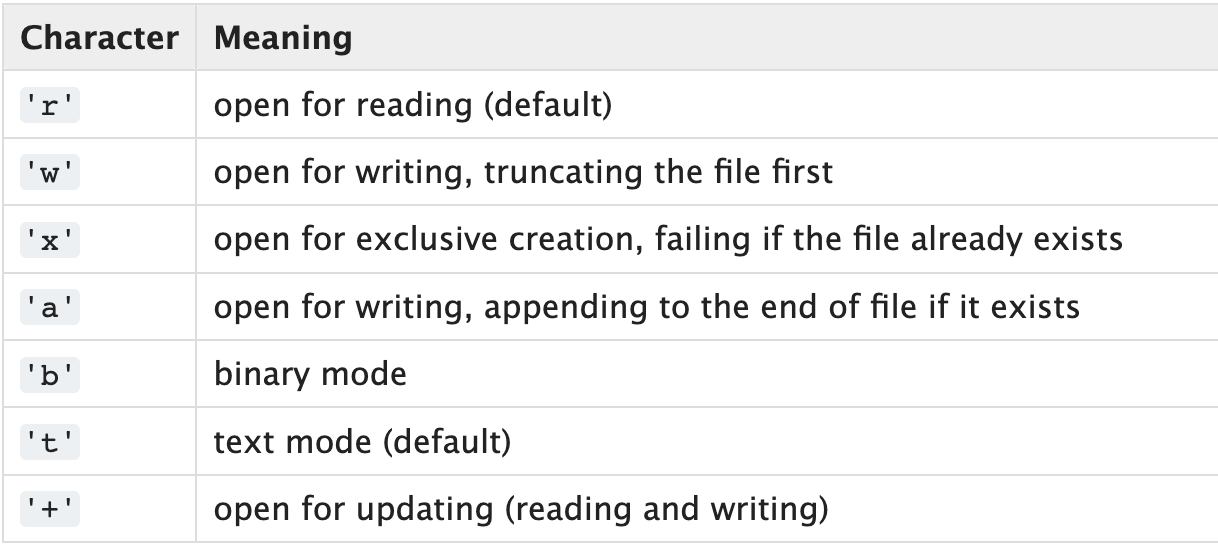

In [1]:
# let's read the whole file 
fileObject = open(r'/Users/brandanscully/Documents/GitHub/DATA_510/zenofpython.txt','r')
data = fileObject.read()
print(data)

The Zen of Python
by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [2]:
# Close your files!
fileObject.close()

In [3]:
# let's read line by line and do some formatting
with open(r'/Users/brandanscully/Documents/GitHub/DATA_510/zenofpython.txt','r') as f: # open zenofpython.txt as f
    for index, line in enumerate(f): # create index variable and line variable for iterating
        print("Line {}: {}".format(index, line.strip())) #pass index variable and line variable to constructor
f.close()

Line 0: The Zen of Python
Line 1: by Tim Peters
Line 2: 
Line 3: Beautiful is better than ugly.
Line 4: Explicit is better than implicit.
Line 5: Simple is better than complex.
Line 6: Complex is better than complicated.
Line 7: Flat is better than nested.
Line 8: Sparse is better than dense.
Line 9: Readability counts.
Line 10: Special cases aren't special enough to break the rules.
Line 11: Although practicality beats purity.
Line 12: Errors should never pass silently.
Line 13: Unless explicitly silenced.
Line 14: In the face of ambiguity, refuse the temptation to guess.
Line 15: There should be one-- and preferably only one --obvious way to do it.
Line 16: Although that way may not be obvious at first unless you're Dutch.
Line 17: Now is better than never.
Line 18: Although never is often better than *right* now.
Line 19: If the implementation is hard to explain, it's a bad idea.
Line 20: If the implementation is easy to explain, it may be a good idea.
Line 21: Namespaces are one ho

In [4]:
# let's separate the file into header and content
with open(r'/Users/brandanscully/Documents/GitHub/DATA_510/zenofpython.txt','r') as f: # open zenofpython.txt as f
    data = f.readlines() #read all the lines to an iterable
    header = data[:3] #read all the lines before line 3 to "header" 
    content = data[3:] #read all the lines after line 3 to "content"
f.close()
print(header)

['The Zen of Python\n', 'by Tim Peters\n', '\n']


In [5]:
content #yikes! carriage returns can go.

['Beautiful is better than ugly.\n',
 'Explicit is better than implicit.\n',
 'Simple is better than complex.\n',
 'Complex is better than complicated.\n',
 'Flat is better than nested.\n',
 'Sparse is better than dense.\n',
 'Readability counts.\n',
 "Special cases aren't special enough to break the rules.\n",
 'Although practicality beats purity.\n',
 'Errors should never pass silently.\n',
 'Unless explicitly silenced.\n',
 'In the face of ambiguity, refuse the temptation to guess.\n',
 'There should be one-- and preferably only one --obvious way to do it.\n',
 "Although that way may not be obvious at first unless you're Dutch.\n",
 'Now is better than never.\n',
 'Although never is often better than *right* now.\n',
 "If the implementation is hard to explain, it's a bad idea.\n",
 'If the implementation is easy to explain, it may be a good idea.\n',
 "Namespaces are one honking great idea -- let's do more of those!"]

In [6]:
for line in content:
    print(line.strip()) #the strip( ) method takes trailing space and carriage return.

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [7]:
content[0]

'Beautiful is better than ugly.\n'

In [8]:
content[0].strip()

'Beautiful is better than ugly.'

In [9]:
content[0].rstrip('.\n')

'Beautiful is better than ugly'

In [10]:
content[0].lstrip('B').rstrip('.\n')

'eautiful is better than ugly'

In [11]:
# But the line is still held in content[0]
content[0]

'Beautiful is better than ugly.\n'

In [12]:
#so let's make a list of clean strings
content = [line.strip() for line in content] #list comprehension
content

['Beautiful is better than ugly.',
 'Explicit is better than implicit.',
 'Simple is better than complex.',
 'Complex is better than complicated.',
 'Flat is better than nested.',
 'Sparse is better than dense.',
 'Readability counts.',
 "Special cases aren't special enough to break the rules.",
 'Although practicality beats purity.',
 'Errors should never pass silently.',
 'Unless explicitly silenced.',
 'In the face of ambiguity, refuse the temptation to guess.',
 'There should be one-- and preferably only one --obvious way to do it.',
 "Although that way may not be obvious at first unless you're Dutch.",
 'Now is better than never.',
 'Although never is often better than *right* now.',
 "If the implementation is hard to explain, it's a bad idea.",
 'If the implementation is easy to explain, it may be a good idea.',
 "Namespaces are one honking great idea -- let's do more of those!"]

In [13]:
# Let's make a word counter

def wordCounter(path=r'/Users/brandanscully/Documents/GitHub/DATA_510/zenofpython.txt'):
    """Prints a rudimentary count of words in a text file.
    
    path: path string to a text file
    """
    file =open(path,"rt")
    data=file.read()
    file.close()
    words=data.split()
    words = [word.rstrip(".\n") for word in words]
    print("{} has {} words.".format(path.split("/")[-1],len(words)))

wordCounter()

zenofpython.txt has 144 words.


In [18]:
# How about a unique word counter?

def uniqueWordCounter(path=r'/Users/brandanscully/Documents/GitHub/DATA_510/zenofpython.txt'):
    """Prints a rudimentary count of unique words in a text file.
    
    path: path string to a text file
    """
    file = open(path,"rt")
    data = file.read()
    file.close()
    words = data.split()
    words = [word.rstrip(".\n") for word in words]
    words = set(words)
    count = 0
    for word in words:
        count+=1
    
    print("{} has {} unique words.".format(path.split("/")[-1],count))
    print(words)
    
uniqueWordCounter()

zenofpython.txt has 93 unique words.
{'ugly', 'Special', 'The', 'Flat', 'of', 'break', 'never', 'is', 'idea', 'practicality', 'silently', 'nested', 'explain,', 'may', 'unless', 'Sparse', 'Readability', 'Peters', 'enough', 'bad', 'to', 'implementation', 'Namespaces', 'better', 'silenced', 'Python', 'those!', 'that', 'temptation', 'honking', 'ambiguity,', "aren't", 'beats', 'and', 'hard', 'In', 'by', 'face', 'guess', 'pass', 'do', 'complicated', 'Now', 'Unless', 'way', 'cases', 'explicitly', 'easy', 'Zen', '--obvious', 'Complex', 'now', 'good', 'purity', 'Dutch', 'the', 'be', '*right*', 'dense', 'not', 'preferably', 'implicit', 'If', 'than', 'Tim', 'are', 'Errors', 'Simple', 'great', 'rules', 'obvious', 'it', 'often', 'Although', 'more', "it's", 'a', 'first', 'only', '--', 'Explicit', "let's", 'one--', 'special', 'at', 'Beautiful', 'counts', 'one', "you're", 'complex', 'should', 'There', 'refuse'}


In [21]:
# And a word frequency counter?

def wordFrequency(path=r'/Users/brandanscully/Documents/GitHub/DATA_510/zenofpython.txt'):
    """Returns a dict of word:frequency from a text file.
    
    path: path string to a text file
    word_dict: dict of unique words:frequency
    """
    file = open(path,"rt")
    data = file.read()
    file.close()
    words = data.split()
    words = [word.rstrip(".\n") for word in words]
    word_dict={}
    
    for word in words:
        if word in word_dict:
            word_dict[word]+=1
        else:
            word_dict.update({word: 1})
    return word_dict

print(wordFrequency())

{'The': 1, 'Zen': 1, 'of': 3, 'Python': 1, 'by': 1, 'Tim': 1, 'Peters': 1, 'Beautiful': 1, 'is': 10, 'better': 8, 'than': 8, 'ugly': 1, 'Explicit': 1, 'implicit': 1, 'Simple': 1, 'complex': 1, 'Complex': 1, 'complicated': 1, 'Flat': 1, 'nested': 1, 'Sparse': 1, 'dense': 1, 'Readability': 1, 'counts': 1, 'Special': 1, 'cases': 1, "aren't": 1, 'special': 1, 'enough': 1, 'to': 5, 'break': 1, 'the': 5, 'rules': 1, 'Although': 3, 'practicality': 1, 'beats': 1, 'purity': 1, 'Errors': 1, 'should': 2, 'never': 3, 'pass': 1, 'silently': 1, 'Unless': 1, 'explicitly': 1, 'silenced': 1, 'In': 1, 'face': 1, 'ambiguity,': 1, 'refuse': 1, 'temptation': 1, 'guess': 1, 'There': 1, 'be': 3, 'one--': 1, 'and': 1, 'preferably': 1, 'only': 1, 'one': 2, '--obvious': 1, 'way': 2, 'do': 2, 'it': 2, 'that': 1, 'may': 2, 'not': 1, 'obvious': 1, 'at': 1, 'first': 1, 'unless': 1, "you're": 1, 'Dutch': 1, 'Now': 1, 'often': 1, '*right*': 1, 'now': 1, 'If': 2, 'implementation': 2, 'hard': 1, 'explain,': 2, "it's": 

In [22]:
# Let's make a plagiarism checker

def plagiarismChecker(studentSubmission, path=r'/Users/brandanscully/Documents/GitHub/DATA_510/zenofpython.txt'):
    """Cast a list of strings to a set, 
    then check a novel string against the set.
    
    studentSubmission: a novel string
    path: path string to a reference corpus stored in a text file
    """
    with open(path,'r') as f: # open zenofpython.txt as f
        data = f.readlines() #read all the lines to an iterable
        header = data[:3] #read all the lines before line 3 to "header" 
        content = data[3:] #read all the lines after line 3 to "content"
    
    f.close()
    
    content = [line.strip() for line in content]
    
    strings = set(content)
    
    if studentSubmission in strings:
        print("Plagiarism detected!")
    else:
        print("Very original!")

studentSubmission = "Flat is better than nested."

plagiarismChecker(studentSubmission)

Plagiarism detected!


In [23]:
plagiarismChecker("Original content!")

Very original!


In [25]:
import os
# Let's write our content to a text file
fPath = r'/Users/brandanscully/Documents/GitHub/DATA_510/zenofpython.txt'

newFname = 'zpcontent.txt'
dirPath = os.path.dirname(fPath)

newFpath = os.path.join(dirPath,newFname)
print(newFpath)

with open(newFpath, 'w') as fp:
    for line in content:
        fp.write(line)

fp.close()

/Users/brandanscully/Documents/GitHub/DATA_510/zpcontent.txt


In [26]:
#check the file
with open(newFpath, 'r') as fp:
    print(fp.readlines())

["Beautiful is better than ugly.Explicit is better than implicit.Simple is better than complex.Complex is better than complicated.Flat is better than nested.Sparse is better than dense.Readability counts.Special cases aren't special enough to break the rules.Although practicality beats purity.Errors should never pass silently.Unless explicitly silenced.In the face of ambiguity, refuse the temptation to guess.There should be one-- and preferably only one --obvious way to do it.Although that way may not be obvious at first unless you're Dutch.Now is better than never.Although never is often better than *right* now.If the implementation is hard to explain, it's a bad idea.If the implementation is easy to explain, it may be a good idea.Namespaces are one honking great idea -- let's do more of those!"]


In [27]:
# we forgot the carriage returns!
# let's delete the file and start over.
os.remove(newFpath)

with open(newFpath, 'w') as fp:
    for line in content:
        fp.write(line+"\n")

fp.close()

#go look for the file

In [28]:
#check the file again
with open(newFpath, 'r') as fp:
    data=fp.readlines()

fp.close()

data

['Beautiful is better than ugly.\n',
 'Explicit is better than implicit.\n',
 'Simple is better than complex.\n',
 'Complex is better than complicated.\n',
 'Flat is better than nested.\n',
 'Sparse is better than dense.\n',
 'Readability counts.\n',
 "Special cases aren't special enough to break the rules.\n",
 'Although practicality beats purity.\n',
 'Errors should never pass silently.\n',
 'Unless explicitly silenced.\n',
 'In the face of ambiguity, refuse the temptation to guess.\n',
 'There should be one-- and preferably only one --obvious way to do it.\n',
 "Although that way may not be obvious at first unless you're Dutch.\n",
 'Now is better than never.\n',
 'Although never is often better than *right* now.\n',
 "If the implementation is hard to explain, it's a bad idea.\n",
 'If the implementation is easy to explain, it may be a good idea.\n',
 "Namespaces are one honking great idea -- let's do more of those!\n"]

# Reading & Writing *.csv files

We're going to use the [csv](https://docs.python.org/3/library/csv.html) module.

csv.reader(filepath) reads csv files

csv.writer(filepath) writes csv files

In [31]:
import csv

cPath = r'/Users/brandanscully/Documents/GitHub/DATA_510/handyrefs.csv'

with open(cPath) as csvFile:
    cData = csv.reader(csvFile) #cData is an iterable csv.reader object that generates a list for each line.
    for row in cData:
        print(row)
    print(type(row))

csvFile.close()

['Reference Number', 'Name', 'Link']
['1', 'Python Docs', 'https://docs.python.org/3/']
['2', 'Python Tutorial', 'https://www.pythontutorial.net/python-basics/']
['3', 'GitHub', 'https://github.com/']
['4', 'Python Anacondas distribution', 'https://www.anaconda.com/products/distribution']
['5', 'Stack Overflow', 'https://stackoverflow.com/questions/tagged/python']
['6', 'Data is Plural', 'https://www.data-is-plural.com/']
['7', 'Exploratory Data Analysis, Tukey', 'http://www.ru.ac.bd/wp-content/uploads/sites/25/2019/03/102_05_01_Tukey-Exploratory-Data-Analysis-1977.pdf']
['8', 'Exploratory Data Analysis: Past, Present, and Future, Tukey', 'https://apps.dtic.mil/sti/pdfs/ADA266775.pdf']
['9', 'An introduction to statistical learning', 'https://www.statlearning.com/']
<class 'list'>


In [32]:
type(cData)

_csv.reader

In [33]:
#we can instead open the csv file with a dict reader

rowList = [] #we'll need this
with open (cPath) as csvFile:
    cDataDict = csv.DictReader(csvFile) #cDataDict is an iterable object called an ordered dict
    for row in cDataDict:
        rowList.append(row)
        print(row) #each row is stored as a dictionary with keys from the columns of the first row.

csvFile.close()        

{'Reference Number': '1', 'Name': 'Python Docs', 'Link': 'https://docs.python.org/3/'}
{'Reference Number': '2', 'Name': 'Python Tutorial', 'Link': 'https://www.pythontutorial.net/python-basics/'}
{'Reference Number': '3', 'Name': 'GitHub', 'Link': 'https://github.com/'}
{'Reference Number': '4', 'Name': 'Python Anacondas distribution', 'Link': 'https://www.anaconda.com/products/distribution'}
{'Reference Number': '5', 'Name': 'Stack Overflow', 'Link': 'https://stackoverflow.com/questions/tagged/python'}
{'Reference Number': '6', 'Name': 'Data is Plural', 'Link': 'https://www.data-is-plural.com/'}
{'Reference Number': '7', 'Name': 'Exploratory Data Analysis, Tukey', 'Link': 'http://www.ru.ac.bd/wp-content/uploads/sites/25/2019/03/102_05_01_Tukey-Exploratory-Data-Analysis-1977.pdf'}
{'Reference Number': '8', 'Name': 'Exploratory Data Analysis: Past, Present, and Future, Tukey', 'Link': 'https://apps.dtic.mil/sti/pdfs/ADA266775.pdf'}
{'Reference Number': '9', 'Name': 'An introduction to 

In [34]:
"""we can parse the dict programmatically by accessing the dict at each row with keys.

Let's format the contents into string output, then extract the links to a dict"""


refDict = {} #we'll use this to capture the reference name and the associated link

with open (cPath) as csvFile:
    cDataDict = csv.DictReader(csvFile)
    
    for row in cDataDict:
        print('{} is Reference Number {}. The URL is: {}'.format(row["Name"], row['Reference Number'], row['Link']))
        refDict[row["Name"]]=row["Link"]
        
csvFile.close()

Python Docs is Reference Number 1. The URL is: https://docs.python.org/3/
Python Tutorial is Reference Number 2. The URL is: https://www.pythontutorial.net/python-basics/
GitHub is Reference Number 3. The URL is: https://github.com/
Python Anacondas distribution is Reference Number 4. The URL is: https://www.anaconda.com/products/distribution
Stack Overflow is Reference Number 5. The URL is: https://stackoverflow.com/questions/tagged/python
Data is Plural is Reference Number 6. The URL is: https://www.data-is-plural.com/
Exploratory Data Analysis, Tukey is Reference Number 7. The URL is: http://www.ru.ac.bd/wp-content/uploads/sites/25/2019/03/102_05_01_Tukey-Exploratory-Data-Analysis-1977.pdf
Exploratory Data Analysis: Past, Present, and Future, Tukey is Reference Number 8. The URL is: https://apps.dtic.mil/sti/pdfs/ADA266775.pdf
An introduction to statistical learning is Reference Number 9. The URL is: https://www.statlearning.com/


In [35]:
#now we can pass along a dict that stores csv data without having to read directly from the file.
refDict

{'Python Docs': 'https://docs.python.org/3/',
 'Python Tutorial': 'https://www.pythontutorial.net/python-basics/',
 'GitHub': 'https://github.com/',
 'Python Anacondas distribution': 'https://www.anaconda.com/products/distribution',
 'Stack Overflow': 'https://stackoverflow.com/questions/tagged/python',
 'Data is Plural': 'https://www.data-is-plural.com/',
 'Exploratory Data Analysis, Tukey': 'http://www.ru.ac.bd/wp-content/uploads/sites/25/2019/03/102_05_01_Tukey-Exploratory-Data-Analysis-1977.pdf',
 'Exploratory Data Analysis: Past, Present, and Future, Tukey': 'https://apps.dtic.mil/sti/pdfs/ADA266775.pdf',
 'An introduction to statistical learning': 'https://www.statlearning.com/'}

In [36]:
# trivial reuse example
for key in refDict.keys():
    print("{} : {}".format(key, refDict[key]))

Python Docs : https://docs.python.org/3/
Python Tutorial : https://www.pythontutorial.net/python-basics/
GitHub : https://github.com/
Python Anacondas distribution : https://www.anaconda.com/products/distribution
Stack Overflow : https://stackoverflow.com/questions/tagged/python
Data is Plural : https://www.data-is-plural.com/
Exploratory Data Analysis, Tukey : http://www.ru.ac.bd/wp-content/uploads/sites/25/2019/03/102_05_01_Tukey-Exploratory-Data-Analysis-1977.pdf
Exploratory Data Analysis: Past, Present, and Future, Tukey : https://apps.dtic.mil/sti/pdfs/ADA266775.pdf
An introduction to statistical learning : https://www.statlearning.com/


In [37]:
"""Remember rowList? 
It was a list of dictionaries from each row of the original CSV."""
rowList

[{'Reference Number': '1',
  'Name': 'Python Docs',
  'Link': 'https://docs.python.org/3/'},
 {'Reference Number': '2',
  'Name': 'Python Tutorial',
  'Link': 'https://www.pythontutorial.net/python-basics/'},
 {'Reference Number': '3', 'Name': 'GitHub', 'Link': 'https://github.com/'},
 {'Reference Number': '4',
  'Name': 'Python Anacondas distribution',
  'Link': 'https://www.anaconda.com/products/distribution'},
 {'Reference Number': '5',
  'Name': 'Stack Overflow',
  'Link': 'https://stackoverflow.com/questions/tagged/python'},
 {'Reference Number': '6',
  'Name': 'Data is Plural',
  'Link': 'https://www.data-is-plural.com/'},
 {'Reference Number': '7',
  'Name': 'Exploratory Data Analysis, Tukey',
  'Link': 'http://www.ru.ac.bd/wp-content/uploads/sites/25/2019/03/102_05_01_Tukey-Exploratory-Data-Analysis-1977.pdf'},
 {'Reference Number': '8',
  'Name': 'Exploratory Data Analysis: Past, Present, and Future, Tukey',
  'Link': 'https://apps.dtic.mil/sti/pdfs/ADA266775.pdf'},
 {'Referen

In [38]:
#to wrtie rowList to a csv, we can use the csv writer.
col=['Reference Number', 'Name', 'Link']
with open (r'/Users/brandanscully/Documents/DATA_510_Draft/output.csv','w') as outFile:
    writer = csv.DictWriter(outFile,fieldnames=col)
    writer.writeheader()
    for row in rowList:
        writer.writerow(row)
outFile.close()

# go to the file location and see that it was written out.

# Working with JSON

Java Script Object Notation ([JSON](https://www.json.org/json-en.html)) is a text format that allows data interchange.

It's built on two data structures that we've learned about:

* the key:value pair (dictionary or dict)
* an ordered list of values (list)

We'll talk more about [python's JSON library](https://docs.python.org/3/library/json.html) later. I just wanted to introduce JSON because that's how we often get data from an API.

# Working with APIs

An Application Programming Interface (API) is the set of rules for interacting with a service.

A Representational State Transfer (REST) API uses HTTP requests to communicate with web services.

For the purpose of DATA 510, a REST API is a data source that lives at an internet address that can be accessed according to certain rules specified by the API's owner.

# API lingo

An API __endpoint__ is the public Universal Resource Locator (URL) exposed by a server that a client application uses to access resources and data.

A __status code__ tells us something about our request. You've no doubt seen 404 - resource not found.

We'll be using python's [requests](https://pypi.org/project/requests/) library to make requests to APIs.

# Example APIs

* Twitter: https://developer.twitter.com/en/docs/twitter-api
* Open Weather Map: https://openweathermap.org/api
* Zillow: https://www.zillow.com/howto/api/APIOverview.htm
* USA Spending: https://api.usaspending.gov
* NASA: https://api.nasa.gov/

# HTTP Requests

Hyper Text Transfer Protocol (HTTP) has 4 main [request types](https://httpwg.org/specs/rfc9110.html#method.definitions):

* __GET__: retrieve data stored in the API. You will most likely use this exclusively in DATA 510 (unless you build a web enabled database).
* __POST__: add data to the server.
* __PUT__: changes existing data.
* __DELETE__: deletes existing data.

# HTTP Request Status Codes

Once you've made a request to an endpoint, you should receive a [request status code](https://httpwg.org/specs/rfc9110.html#status.codes). These are the broad strokes:

* 1xx (Informational): The request was received, continuing process
* 2xx (Successful): The request was successfully received, understood, and accepted
* 3xx (Redirection): Further action needs to be taken in order to complete the request
* 4xx (Client Error): The request contains bad syntax or cannot be fulfilled
* 5xx (Server Error): The server failed to fulfill an apparently valid request

# API Demo

Some APIs ask alot of users:

* have an account
* have a security key
* pay money

The [fakestoreapi.com](https://fakestoreapi.com/) api asks none of these! 

It's a handy tool for introducing API calls, but the results are trivial.

In [39]:
"""I pulled this next bit from a tutorial on API's using the reference website

https://www.freecodecamp.org/news/how-to-interact-with-web-services-using-python/"""

import requests

base_url = 'https://fakestoreapi.com'

response = requests.get(f"{base_url}/products")
print(response.json())

[{'id': 1, 'title': 'Fjallraven - Foldsack No. 1 Backpack, Fits 15 Laptops', 'price': 109.95, 'description': 'Your perfect pack for everyday use and walks in the forest. Stash your laptop (up to 15 inches) in the padded sleeve, your everyday', 'category': "men's clothing", 'image': 'https://fakestoreapi.com/img/81fPKd-2AYL._AC_SL1500_.jpg', 'rating': {'rate': 3.9, 'count': 120}}, {'id': 2, 'title': 'Mens Casual Premium Slim Fit T-Shirts ', 'price': 22.3, 'description': 'Slim-fitting style, contrast raglan long sleeve, three-button henley placket, light weight & soft fabric for breathable and comfortable wearing. And Solid stitched shirts with round neck made for durability and a great fit for casual fashion wear and diehard baseball fans. The Henley style round neckline includes a three-button placket.', 'category': "men's clothing", 'image': 'https://fakestoreapi.com/img/71-3HjGNDUL._AC_SY879._SX._UX._SY._UY_.jpg', 'rating': {'rate': 4.1, 'count': 259}}, {'id': 3, 'title': 'Mens Cotto

In [40]:
print(response.status_code)

200


In [41]:
response.json() 

[{'id': 1,
  'title': 'Fjallraven - Foldsack No. 1 Backpack, Fits 15 Laptops',
  'price': 109.95,
  'description': 'Your perfect pack for everyday use and walks in the forest. Stash your laptop (up to 15 inches) in the padded sleeve, your everyday',
  'category': "men's clothing",
  'image': 'https://fakestoreapi.com/img/81fPKd-2AYL._AC_SL1500_.jpg',
  'rating': {'rate': 3.9, 'count': 120}},
 {'id': 2,
  'title': 'Mens Casual Premium Slim Fit T-Shirts ',
  'price': 22.3,
  'description': 'Slim-fitting style, contrast raglan long sleeve, three-button henley placket, light weight & soft fabric for breathable and comfortable wearing. And Solid stitched shirts with round neck made for durability and a great fit for casual fashion wear and diehard baseball fans. The Henley style round neckline includes a three-button placket.',
  'category': "men's clothing",
  'image': 'https://fakestoreapi.com/img/71-3HjGNDUL._AC_SY879._SX._UX._SY._UY_.jpg',
  'rating': {'rate': 4.1, 'count': 259}},
 {'id

In [42]:
#many products! let's try passing a limit using params

query_params = {
    'limit':3
}
response = requests.get(f"{base_url}/products", params=query_params)

In [43]:
response.json()

[{'id': 1,
  'title': 'Fjallraven - Foldsack No. 1 Backpack, Fits 15 Laptops',
  'price': 109.95,
  'description': 'Your perfect pack for everyday use and walks in the forest. Stash your laptop (up to 15 inches) in the padded sleeve, your everyday',
  'category': "men's clothing",
  'image': 'https://fakestoreapi.com/img/81fPKd-2AYL._AC_SL1500_.jpg',
  'rating': {'rate': 3.9, 'count': 120}},
 {'id': 2,
  'title': 'Mens Casual Premium Slim Fit T-Shirts ',
  'price': 22.3,
  'description': 'Slim-fitting style, contrast raglan long sleeve, three-button henley placket, light weight & soft fabric for breathable and comfortable wearing. And Solid stitched shirts with round neck made for durability and a great fit for casual fashion wear and diehard baseball fans. The Henley style round neckline includes a three-button placket.',
  'category': "men's clothing",
  'image': 'https://fakestoreapi.com/img/71-3HjGNDUL._AC_SY879._SX._UX._SY._UY_.jpg',
  'rating': {'rate': 4.1, 'count': 259}},
 {'id

# The point here:

API calls are pretty straightforward when:

* You know what you want from the API
* The API is well documented
* You properly construct API query arguments (the URL that gets passed by requests.get)

# What if there is no API?

I've successfully used the techniques in this [article](http://www.gregreda.com/2015/02/15/web-scraping-finding-the-api/).

* YMMV, hacker.